### This Code Implements the Newton's Method for Optimization of a Multivariable Function

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import sympy as sym

Enter a function of x and y: x*y + 4*y - 3*(x**2) - y**2


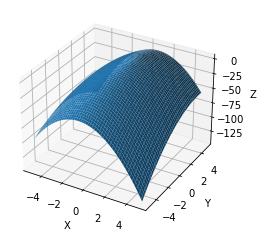

In [32]:
#take fxn input 
fxn_str = input("Enter a function of x and y: ")

#evaluate fxn string as Python Expression
def f(x,y):
    return eval(fxn_str)

#meshgrid with x&y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x,y)

Z = f(X, Y)

#3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

#labels for axes 
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

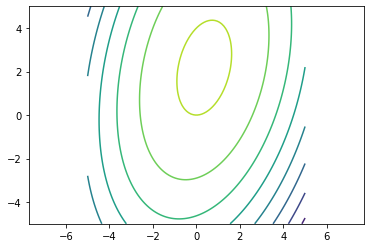

In [33]:
plt.axis("equal")
plt.contour(X, Y, Z)

In [34]:
#initial point
inputList = input("Enter an initial point: ")
inputElems = inputList.split(",")
inputElems = [int(e) for e in inputElems]

xini = sym.Matrix(inputElems) 
print(xini)
# xini = sym.Matrix([0,0])

Enter an initial point: 120, 120
Matrix([[120], [120]])


In [35]:
x,y = sym.symbols('x y')
f = fxn_str

hessian = sym.Matrix([[sym.diff(f, x, x), sym.diff(f, x, y)],
                      [sym.diff(f, y, x), sym.diff(f, y, y)]])

print("Hessian Matrix: ", hessian)
hessianInv = hessian.inv()
print("Inverse Hessian Matrix: ", hessianInv)

grad_fxn = sym.Matrix([sym.diff(f, x), sym.diff(f, y)])
print("Gradient: ", grad_fxn)

tol = 1e-6
iters = 1000
traj = []

for i in range(iters):
    grad_x = grad_fxn.subs({x: xini[0], y: xini[1]})
    xnext = xini - hessianInv * grad_x
    traj.append((float(xini[0]), float(xini[1])))
    print(xnext.evalf())
    if(xnext-xini).norm()<tol:
        print("\nSolution converged after", i, "iterations.")
        print("Root is approximately", xnext.evalf())
        traj.append((float(xnext[0]), float(xnext[1])))
        break
    xini = xnext
else:
    print("Solution did not converge after", iters, "iterations.")

Hessian Matrix:  Matrix([[-6, 1], [1, -2]])
Inverse Hessian Matrix:  Matrix([[-2/11, -1/11], [-1/11, -6/11]])
Gradient:  Matrix([[-6*x + y], [x - 2*y + 4]])
Matrix([[0.363636363636364], [2.18181818181818]])
Matrix([[0.363636363636364], [2.18181818181818]])

Solution converged after 1 iterations.
Root is approximately Matrix([[0.363636363636364], [2.18181818181818]])


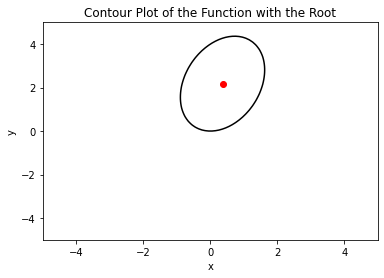

In [36]:
f_np = sym.lambdify((x, y), f, 'numpy')
Z = f_np(X, Y)

plt.contour(X, Y, Z, levels=[0], colors='k')
plt.plot(xnext[0], xnext[1], 'ro') #red dot

plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of the Function with the Root')

plt.show()

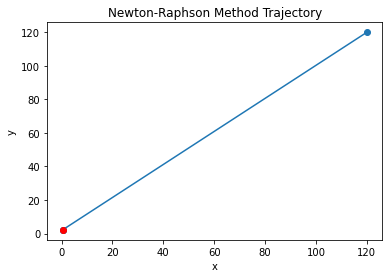

In [37]:
x_traj = [point[0] for point in traj]
y_traj = [point[1] for point in traj]

# Plot the trajectory
plt.plot(x_traj, y_traj, '-o')
plt.plot(float(xnext[0]), float(xnext[1]), 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Newton-Raphson Method Trajectory')
plt.show()